In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    q1, q3 = series.quantile([0.25, 0.75]) # get quartiles
        
    iqr = q3 - q1   # calculate interquartile range

    upper_bound = q3 + multiplier * iqr   # get upper bound
    lower_bound = q1 - multiplier * iqr   # get lower bound
    
    return lower_bound, upper_bound

### Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
lemonade = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [4]:
lemonade

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [5]:
#select continuous variables
num_cols = list(lemonade.select_dtypes(include=np.number).columns)

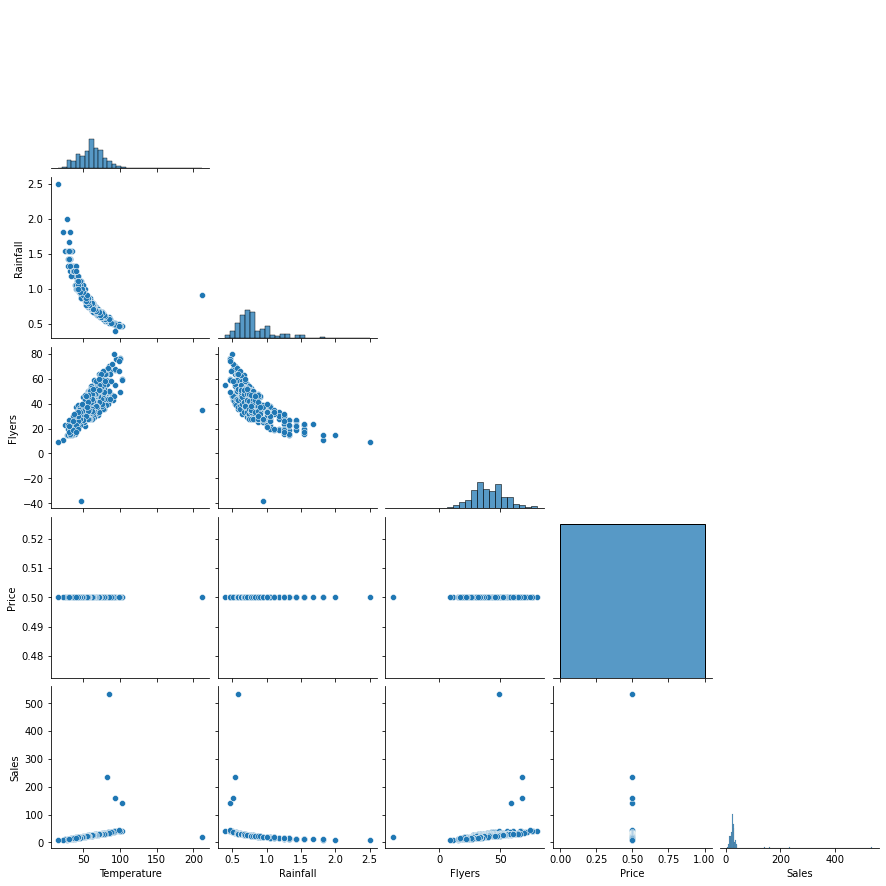

In [6]:
sns.pairplot(lemonade, corner=True);

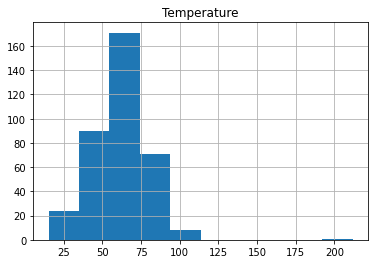

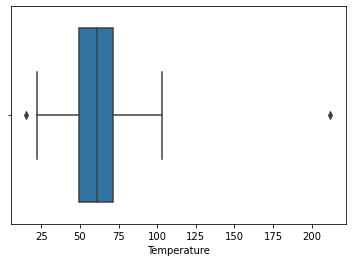

--------


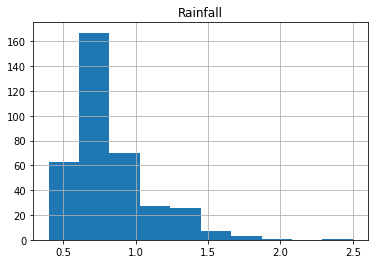

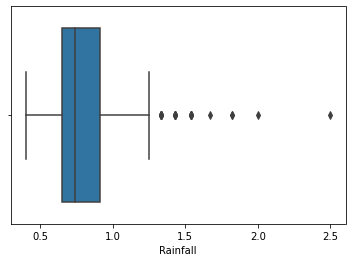

--------


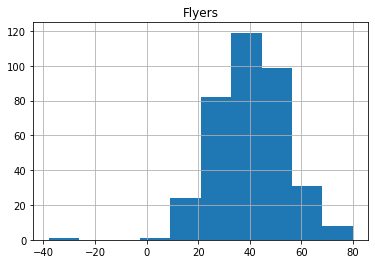

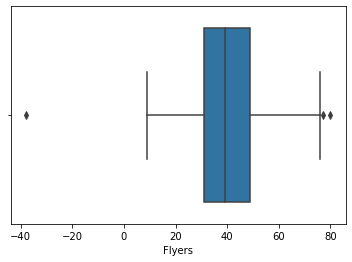

--------


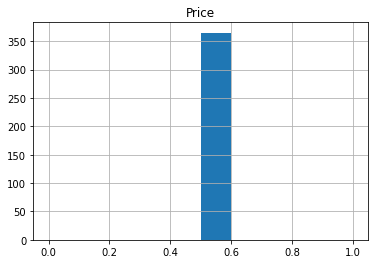

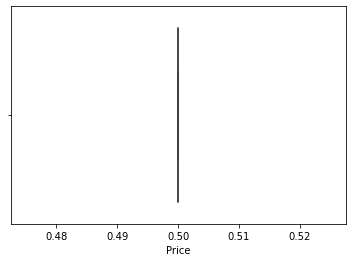

--------


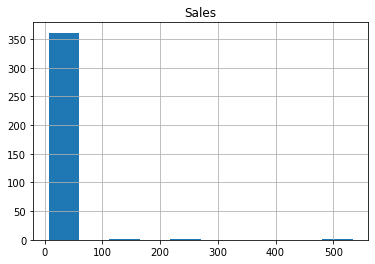

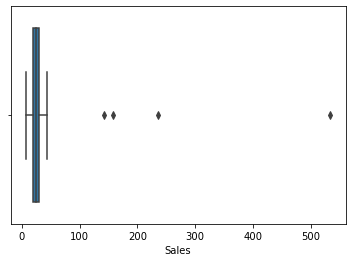

--------


In [7]:
for col in num_cols:
    if np.issubdtype(lemonade[col].dtype, np.number):
        lemonade[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=lemonade, x=col)
        plt.show()
        print('--------')

In [8]:
lemonade['Date'] = pd.to_datetime(lemonade.Date)

In [9]:
lemonade = lemonade.set_index('Date')

In [10]:
lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [11]:
for col in num_cols:
    lower, upper = get_lower_and_upper_bounds(lemonade[col])
    lower_lemons = lemonade[lemonade[col] < lower]
    if not lower_lemons.empty:
        print(f'{col} lower outliers\n{lower_lemons.to_markdown()}\n\n')

Temperature lower outliers
| Date                | Day    |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:-------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-12-31 00:00:00 | Sunday |          15.1 |        2.5 |        9 |     0.5 |       7 |


Flyers lower outliers
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-11-21 00:00:00 | Tuesday |            47 |       0.95 |      -38 |     0.5 |      20 |




#### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [12]:
for col in num_cols:
    lower, upper = get_lower_and_upper_bounds(lemonade[col])
    upper_lemons = lemonade[lemonade[col] > upper]
    if not upper_lemons.empty:
        print(f'{col} upper outliers\n{upper_lemons.to_markdown()}\n\n')

Temperature upper outliers
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 |


Rainfall upper outliers
| Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |      15 |
| 2017-01-06 00:00:00 | Friday    |          25.3 |       1.54 |       23 |     0.5 |      11 |
| 2017-01-07 00:00:00 | Saturday  |          32.9 |       1.54 |       19 |     0.5 | 

#### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each column of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [13]:
for col in num_cols:
    lower, upper = get_lower_and_upper_bounds(lemonade[col], multiplier = 3)
    lower_lemons = lemonade[lemonade[col] < lower]
    if not lower_lemons.empty:
        print(f'{col} outer lower outliers\n{lower_lemons.to_markdown()}\n\n')

Flyers outer lower outliers
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-11-21 00:00:00 | Tuesday |            47 |       0.95 |      -38 |     0.5 |      20 |




#### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each column of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [14]:
for col in num_cols:
    lower, upper = get_lower_and_upper_bounds(lemonade[col], multiplier = 3)
    upper_lemons = lemonade[lemonade[col] > upper]
    if not upper_lemons.empty:
        print(f'{col} outer upper outliers\n{upper_lemons.to_markdown()}\n\n')

Temperature outer upper outliers
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 |


Rainfall outer upper outliers
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 |
| 2017-12-31 00:00:00 | Sunday  |          15.1 |       2.5  |        9 |     0.5 |       7 |


Sales outer upper outliers
| Date                | Day      |   Temperature |   Rain

### Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

#### Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?
- Should certain outliers be kept or removed?

In [15]:
z_scores = (lemonade['Temperature'] - lemonade['Temperature'].mean()) / lemonade['Temperature'].std()

In [16]:
lemonade['temp_zscores'] = z_scores

In [17]:
lemonade[lemonade['temp_zscores'].abs() >=2]

,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscores
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,8.336627
2017-06-16,Friday,99.3,0.47,77,0.5,41,2.105251
2017-06-26,Monday,102.6,0.47,60,0.5,42,2.287714
2017-07-01,Saturday,102.9,0.47,59,0.5,143,2.304301
2017-07-10,Monday,98.0,0.49,66,0.5,40,2.033372
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,2.105251
2017-07-22,Saturday,99.6,0.47,49,0.5,42,2.121838
2017-07-27,Thursday,97.9,0.47,74,0.5,43,2.027843
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.168799


### Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [18]:
lemonade[lemonade['temp_zscores'].abs() >=3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscores
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,8.336627
